In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [ ]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
import os
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1Yg8K6QV1lIOr_Nh-sdbnqpQXuDzPCktK'})

In [ ]:
download.GetContentFile('Cotton_percentage.zip')
!unzip Cotton_percentage.zip

Streaming output truncated to the last 5000 lines.
  inflating: cotton_percentage/test/1666im_2.png  
  inflating: cotton_percentage/test/1668im_1.png  
  inflating: cotton_percentage/test/1668im_2.png  
  inflating: cotton_percentage/test/1669im_3.png  
  inflating: cotton_percentage/test/1669im_4.png  
  inflating: cotton_percentage/test/166im_3.png  
  inflating: cotton_percentage/test/166im_4.png  
  inflating: cotton_percentage/test/1670im_3.png  
  inflating: cotton_percentage/test/1670im_4.png  
  inflating: cotton_percentage/test/1678im_1.png  
  inflating: cotton_percentage/test/1678im_2.png  
  inflating: cotton_percentage/test/1679im_3.png  
  inflating: cotton_percentage/test/1679im_4.png  
  inflating: cotton_percentage/test/167im_3.png  
  inflating: cotton_percentage/test/167im_4.png  
  inflating: cotton_percentage/test/1680im_1.png  
  inflating: cotton_percentage/test/1680im_2.png  
  inflating: cotton_percentage/test/168im_1.png  
  inflating: cotton_percentage/test/

In [ ]:
train = pd.read_csv('/content/cotton_percentage/train.csv')

In [ ]:
test = pd.read_csv('/content/cotton_percentage/test.csv')

In [ ]:
train=train.sample(frac=1)
train.head()

,img_link,cotton_percent
1661,490im_1.png,100
2975,11_6.png,60
2844,694im_2.png,100
2200,1818im_4.png,100
3471,744im_3.png,100


In [ ]:
# Load and preprocess images
def load_images(df, image_dir):
    images = []
    for img_name in df['img_link']:
        img_path = os.path.join(image_dir, img_name)
        img = load_img(img_path, target_size=(150, 150))  # Assuming images are resized to 150x150
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)

In [ ]:
X_train = load_images(train, '/content/cotton_percentage/train')

In [ ]:
X_test = load_images(test, '/content/cotton_percentage/test')

In [ ]:
y_train = train['cotton_percent'].values
y_test = test['cotton_percent'].values

In [ ]:
y_train

array([100,  60, 100, ...,  65,  93, 100])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, batch_size=32)

Epoch 1/6
102/102 [==============================] - 10s 43ms/step - loss: 649.1398 - val_loss: 362.4535
Epoch 2/6
102/102 [==============================] - 3s 26ms/step - loss: 347.5238 - val_loss: 426.0423
Epoch 3/6
102/102 [==============================] - 3s 25ms/step - loss: 361.4508 - val_loss: 351.0580
Epoch 4/6
102/102 [==============================] - 3s 25ms/step - loss: 338.9636 - val_loss: 909.2624
Epoch 5/6
102/102 [==============================] - 3s 26ms/step - loss: 379.1175 - val_loss: 375.6301
Epoch 6/6
102/102 [==============================] - 3s 28ms/step - loss: 311.4520 - val_loss: 379.4113


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

41/41 [==============================] - 1s 19ms/step - loss: 187.9596
Test Loss: 187.95957946777344
41/41 [==============================] - 0s 9ms/step


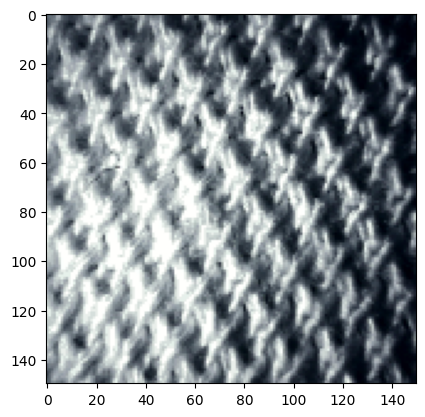

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 29ms/step


array([[96.06407]], dtype=float32)

In [ ]:
y_test[0]

100

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted values
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 7.909487601060134
Mean Squared Error (MSE): 187.95958906658907
Root Mean Squared Error (RMSE): 13.709835486488855
R-squared (R²): -0.11035429064578373


In [ ]:
predictions

array([[ 96.06408],
       [103.66279],
       [101.40823],
       ...,
       [ 98.65489],
       [100.45723],
       [ 95.31889]], dtype=float32)

In [ ]:
model.save('cottonpercent.h5')